In [ ]:
# %pip install -I torch==1.9.1+cu111 torchvision==0.10.1+cu111 torchtext==0.10.1 -f https://download.pytorch.org/whl/torch_stable.html
# %pip install -I pandas==1.3.3
# %pip install -I sacrebleu==2.0.0

Defaulting to user installation because normal site-packages is not writeable
Looking in links: https://download.pytorch.org/whl/torch_stable.html
  Using cached https://download.pytorch.org/whl/cu111/torch-1.9.1%2Bcu111-cp37-cp37m-linux_x86_64.whl (2041.3 MB)
  Using cached https://download.pytorch.org/whl/cu111/torchvision-0.10.1%2Bcu111-cp37-cp37m-linux_x86_64.whl (20.6 MB)
  Using cached torchtext-0.10.1-cp37-cp37m-manylinux1_x86_64.whl (7.6 MB)
     |████████████████████████████████| 76 kB 2.2 MB/s 
     |████████████████████████████████| 15.7 MB 12.8 MB/s 
     |████████████████████████████████| 62 kB 874 kB/s 
     |████████████████████████████████| 3.1 MB 46.0 MB/s 
     |████████████████████████████████| 61 kB 9.3 MB/s 
     |████████████████████████████████| 149 kB 91.0 MB/s 
     |████████████████████████████████| 138 kB 91.4 MB/s 
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this direct

In [ ]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=15S0KQwoGPJAZ1mclzVz8OHOp1FChSwpf' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=15S0KQwoGPJAZ1mclzVz8OHOp1FChSwpf" -O arch.zip && rm -rf /tmp/cookies.txt

--2021-11-02 09:55:04--  https://docs.google.com/uc?export=download&confirm=&id=15S0KQwoGPJAZ1mclzVz8OHOp1FChSwpf
Resolving docs.google.com (docs.google.com)... 142.250.150.194, 2a00:1450:4010:c0e::c2
Connecting to docs.google.com (docs.google.com)|142.250.150.194|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-04-98-docs.googleusercontent.com/docs/securesc/074i7r21nv18ht8g1cufih2pa60j6j8c/83aep8g2u684bule5t8k363v44rfk32q/1635846900000/07645950417741638680/05555098334573446076Z/15S0KQwoGPJAZ1mclzVz8OHOp1FChSwpf?e=download [following]
--2021-11-02 09:55:05--  https://doc-04-98-docs.googleusercontent.com/docs/securesc/074i7r21nv18ht8g1cufih2pa60j6j8c/83aep8g2u684bule5t8k363v44rfk32q/1635846900000/07645950417741638680/05555098334573446076Z/15S0KQwoGPJAZ1mclzVz8OHOp1FChSwpf?e=download
Resolving doc-04-98-docs.googleusercontent.com (doc-04-98-docs.googleusercontent.com)... 173.194.222.132, 2a00:1450:4010:c08::84
Connecting to doc-04-98-

In [ ]:
!unzip -q -n arch.zip

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import pandas as pd
import torchvision
import torchtext
import sacrebleu

print(torch.__version__, torchvision.__version__, torchtext.__version__, pd.__version__, sacrebleu.__version__)

1.9.1+cu111 0.10.1+cu111 0.10.1 1.3.3 2.0.0


In [ ]:
import random
def set_seeds(val=23):
    torch.manual_seed(val)
    np.random.seed(val)
    random.seed(val)

set_seeds()

In [ ]:
FOLDER = 'homework_machine_translation_de-en/'
FROM_SUFFIX = '.de-en.de'
TO_SUFFIX = '.de-en.en'

import os

def get_list(name):
    s = []
    with open(FOLDER + name) as file:
        for l in file:
            s.append(l.split())
    return s

train_X = get_list('train' + FROM_SUFFIX)
train_y = get_list('train' + TO_SUFFIX)
val_X = get_list('val' + FROM_SUFFIX)
val_y = get_list('val' + TO_SUFFIX)
train_df = list(zip(train_X, train_y))
val_df = list(zip(val_X, val_y))
test_X = get_list('test1' + FROM_SUFFIX)

In [ ]:
def get_as_list(name):
    s = []
    with open(FOLDER + name) as file:
        for l in file:
            s.append(l)
    return s

val_as_list = get_as_list('val' + TO_SUFFIX)

In [ ]:
print(len(train_df), len(val_df), len(test_X))

195915 986 2998


In [ ]:
#!g1.1
stats = {}

for i in range(len(train_X)):
    key = len(train_X[i])
    if key not in stats:
        stats[key] = [0, 0]
    stats[key][0] += len(train_y[i])
    stats[key][1] += 1

print('done')
print(stats.keys())

for i in stats.keys():
    stats[i][0] /= stats[i][1] * i


done
dict_keys([13, 12, 25, 23, 16, 14, 7, 8, 51, 11, 15, 19, 17, 20, 28, 44, 5, 32, 10, 46, 9, 31, 6, 27, 33, 39, 21, 37, 18, 45, 22, 36, 35, 24, 41, 4, 30, 43, 3, 2, 26, 29, 34, 64, 48, 40, 52, 58, 72, 42, 47, 57, 38, 55, 56, 66, 59, 50, 53, 49, 61, 54, 62, 67, 77, 78, 60, 70, 74, 68, 63, 65, 75, 69, 73, 80, 76, 79, 71])


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
#plt.rcParams["figure.figsize"] = (16,8)

def plot_history(train_history, val_history, title='loss'):
    plt.xlabel('train steps')
    #plt.ylbabel('loss')
    plt.title(title)
    plt.plot(train_history, label='train')
    plt.plot(np.arange(1, len(val_history) + 1) * len(train_history) / len(val_history) - 1, val_history, '+', mew=3, ms=15, label='val')
    plt.grid()
    plt.show()

In [ ]:

from torchtext import vocab

def yield_tokens(lang):
    if lang == 'de':
        #for x in train_X:
        #    yield x
        #for x in val_X:
        #    yield x
        for x in test_X:
            yield x
    else:
        for x in train_y:
            yield x
        for x in val_y:
            yield x

UNK_IDX, PAD_IDX, BOS_IDX, EOS_IDX = 0, 1, 2, 3

special_symbols = ['<unk>', '<pad>', '<bos>', '<eos>']

min_freqs = {'de': 0, 'en': 25}

vocab_transform = {}
for lang in ['de', 'en']:
    vocab_transform[lang] = vocab.build_vocab_from_iterator(yield_tokens(lang), specials=special_symbols, min_freq=min_freqs[lang])
    vocab_transform[lang].set_default_index(UNK_IDX)


In [ ]:
from collections import Counter, OrderedDict
for lang in ['de', 'en']:
    counter = Counter()
    for i in yield_tokens(lang):
        counter.update(i)
    siz = 0
    perc = 0
    tot = len(list(counter.elements()))
    sig = [30, 50, 80, 90, 95, 99, 100]
    ind = 0
    unique = len(counter.keys())
    print(tot, 'tokens,', unique, 'unique')
    prv = -1
    for i, c in counter.most_common():
        if c != prv and perc * 100 >= tot * sig[ind]:
            print(round(perc / tot * 100, 2), '%', ': ', prv, ' freq, ', siz, '/', unique, ' amount, ', round(siz / unique * 100, 2), '%', sep='')
            ind += 1
        prv = c
        siz += 1
        perc += c
    print('total siz', siz)


52483 tokens, 8011 unique
30.73%: 606 freq, 13/8011 amount, 0.16%
50.31%: 114 freq, 59/8011 amount, 0.74%
80.73%: 5 freq, 1054/8011 amount, 13.16%
90.63%: 2 freq, 3091/8011 amount, 38.58%
total siz 8011
3874661 tokens, 56472 unique
31.1%: 57756 freq, 11/56472 amount, 0.02%
50.11%: 12109 freq, 44/56472 amount, 0.08%
80.01%: 459 freq, 686/56472 amount, 1.21%
90.01%: 91 freq, 2730/56472 amount, 4.83%
95.1%: 25 freq, 6990/56472 amount, 12.38%
99.02%: 3 freq, 26328/56472 amount, 46.62%
total siz 56472


In [ ]:
for lang in ['de', 'en']:
    print('lang info', lang)
    print(vocab_transform[lang].__len__())
    print(vocab_transform[lang].get_itos()[:10])

lang info de
8015
['<unk>', '<pad>', '<bos>', '<eos>', ',', '.', 'und', 'die', 'ich', 'sie']
lang info en
6994
['<unk>', '<pad>', '<bos>', '<eos>', ',', '.', 'the', 'and', 'to', 'of']


In [ ]:
print('max len de', np.max(np.array(list(map(len, train_X)))))
print('max len en', np.max(np.array(list(map(len, train_y)))))


max len de 80
max len en 80


In [ ]:
from torch import Tensor
from torch.nn import Transformer
import math

# helper Module that adds positional encoding to the token embedding to introduce a notion of word order.
class PositionalEncoding(nn.Module):
    def __init__(self,
                 emb_size: int,
                 dropout: float,
                 maxlen: int = 500):
        super(PositionalEncoding, self).__init__()
        den = torch.exp(- torch.arange(0, emb_size, 2)* math.log(10000) / emb_size)
        pos = torch.arange(0, maxlen).reshape(maxlen, 1)
        pos_embedding = torch.zeros((maxlen, emb_size))
        pos_embedding[:, 0::2] = torch.sin(pos * den)
        pos_embedding[:, 1::2] = torch.cos(pos * den)
        pos_embedding = pos_embedding.unsqueeze(-2)

        self.dropout = nn.Dropout(dropout)
        self.pos_embedding = nn.Parameter(pos_embedding)
        #self.register_buffer('pos_embedding', pos_embedding)

    def forward(self, token_embedding: Tensor):
        return self.dropout(token_embedding + self.pos_embedding[:token_embedding.size(0), :])

# helper Module to convert tensor of input indices into corresponding tensor of token embeddings
class TokenEmbedding(nn.Module):
    def __init__(self, vocab_size: int, emb_size):
        super(TokenEmbedding, self).__init__()
        self.embedding = nn.Embedding(vocab_size, emb_size)
        self.emb_size = emb_size

    def forward(self, tokens: Tensor):
        return self.embedding(tokens.long()) * math.sqrt(self.emb_size)

# Seq2Seq Network
class Seq2SeqTransformer(nn.Module):
    def __init__(self,
                 num_encoder_layers: int,
                 num_decoder_layers: int,
                 emb_size: int,
                 nhead: int,
                 src_vocab_size: int,
                 tgt_vocab_size: int,
                 dim_feedforward: int = 512,
                 dropout: float = 0.1):
        super(Seq2SeqTransformer, self).__init__()
        self.transformer = Transformer(d_model=emb_size,
                                       nhead=nhead,
                                       num_encoder_layers=num_encoder_layers,
                                       num_decoder_layers=num_decoder_layers,
                                       dim_feedforward=dim_feedforward,
                                       dropout=dropout)
        self.generator = nn.Linear(emb_size, tgt_vocab_size)
        self.src_tok_emb = TokenEmbedding(src_vocab_size, emb_size)
        self.tgt_tok_emb = TokenEmbedding(tgt_vocab_size, emb_size)
        self.positional_encoding = PositionalEncoding(
            emb_size, dropout=dropout)

    def forward(self,
                src: Tensor,
                trg: Tensor,
                src_mask: Tensor,
                tgt_mask: Tensor,
                src_padding_mask: Tensor,
                tgt_padding_mask: Tensor,
                memory_key_padding_mask: Tensor):
        src_emb = self.positional_encoding(self.src_tok_emb(src))
        tgt_emb = self.positional_encoding(self.tgt_tok_emb(trg))
        outs = self.transformer(src_emb, tgt_emb, src_mask, tgt_mask, None,
                                src_padding_mask, tgt_padding_mask, memory_key_padding_mask)
        return self.generator(outs)

    def encode(self, src, src_mask, src_padding_mask):
        return self.transformer.encoder(self.positional_encoding(
                            self.src_tok_emb(src)), src_mask, src_padding_mask)

    def decode(self, tgt, memory, tgt_mask, src_padding_mask, tgt_padding_mask):
        return self.transformer.decoder(self.positional_encoding(
                          self.tgt_tok_emb(tgt)), memory,
                          tgt_mask=tgt_mask, tgt_key_padding_mask=tgt_padding_mask, memory_key_padding_mask=src_padding_mask)

In [ ]:
def generate_square_subsequent_mask(sz, DEVICE):
    mask = (torch.triu(torch.ones((sz, sz), device=DEVICE)) == 1).transpose(0, 1)
    mask = mask.float().masked_fill(mask == 0, float('-inf')).masked_fill(mask == 1, float(0.0))
    return mask


def create_mask(src, tgt, DEVICE):
    src_seq_len = src.shape[0]
    tgt_seq_len = tgt.shape[0]

    tgt_mask = generate_square_subsequent_mask(tgt_seq_len, DEVICE)
    src_mask = torch.zeros((src_seq_len, src_seq_len),device=DEVICE).type(torch.bool)

    src_padding_mask = (src == PAD_IDX).transpose(0, 1)
    tgt_padding_mask = (tgt == PAD_IDX).transpose(0, 1)
    return src_mask, tgt_mask, src_padding_mask, tgt_padding_mask

In [ ]:
#!g1.1
class LabelSmoothing(nn.Module):
    def __init__(self, label_smoothing):
        super().__init__()
        self.label_smoothing = label_smoothing
    
    def forward(self, pred, tr):
        targ = tr.clone()
        targ[tr == UNK_IDX] = PAD_IDX
        mask = (targ != PAD_IDX)
        x = F.log_softmax(pred, -1)
        A = F.nll_loss(x, targ, ignore_index=PAD_IDX)
        if not self.label_smoothing:
            return A
        n = pred.shape[-1]
        B = torch.sum(torch.sum(-x, -1) * mask) / torch.sum(mask)
        return A * (1 - self.label_smoothing) + B * (self.label_smoothing / (n - 1))


In [ ]:
# function to add BOS/EOS and create tensor for input sequence indices
def tensor_transform(token_ids):
    return torch.cat((torch.tensor([BOS_IDX]),
                      torch.tensor(token_ids),
                      torch.tensor([EOS_IDX])))

def convert_list(s, lang):
    res = []
    for i in s:
        res.append(tensor_transform(vocab_transform[lang](i)))
    return res

conv_train_X = convert_list(train_X, 'de')
conv_train_y = convert_list(train_y, 'en')
conv_val_X = convert_list(val_X, 'de')
conv_val_y = convert_list(val_y, 'en')
conv_test_X = convert_list(test_X, 'de')

In [ ]:
from tqdm.auto import tqdm
from torch.nn.utils.rnn import pad_sequence

def iterate_minibatches(inputs, targets, batchsize, df_frac):
    assert targets is None or len(inputs) == len(targets)
    siz = len(inputs)
    
    end_len = len(inputs) // df_frac
    
    for start_idx in tqdm(range(0, end_len, batchsize)):
        if targets is None:
            yield pad_sequence(inputs[start_idx:min(end_len, start_idx + batchsize)], padding_value=PAD_IDX)
        else:
            yield pad_sequence(inputs[start_idx:min(end_len, start_idx + batchsize)], padding_value=PAD_IDX), \
            pad_sequence(targets[start_idx:min(end_len, start_idx + batchsize)], padding_value=PAD_IDX)

In [ ]:
def train_epoch(model, optimizer, loss_fn, DEVICE, df_frac, batch_size, batch_num, clip_grad):
    model.train()

    loss_log = []
    acc_log = []
    
    running_loss = 0.0
    running_acc = 0.0

    cnter = 0
    
    optimizer.zero_grad()

    for src, tgt in iterate_minibatches(conv_train_X, conv_train_y, batch_size, df_frac):
        src = src.to(DEVICE)
        tgt = tgt.to(DEVICE)

        tgt_input = tgt[:-1, :]

        src_mask, tgt_mask, src_padding_mask, tgt_padding_mask = create_mask(src, tgt_input, DEVICE)

        logits = model(src, tgt_input, src_mask, tgt_mask, src_padding_mask, tgt_padding_mask, src_padding_mask)


        tgt_out = tgt[1:, :].reshape(-1)
        logits = logits.reshape(-1, logits.shape[-1])
        

        loss = loss_fn(logits, tgt_out)
        
        _, preds = torch.max(logits, 1)
        
        running_loss += loss.item()
        running_acc += torch.sum(preds == tgt_out).item() / preds.shape[0]
        
        cnter += 1
        
        loss_log.append(running_loss / cnter)
        acc_log.append(running_acc / cnter)
        
        loss.backward()
        
        if cnter % batch_num == 0 or cnter * batch_size >= len(conv_train_X) // df_frac:
            if clip_grad:
                nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            optimizer.step()
            optimizer.zero_grad()
    
    return loss_log, acc_log

def evaluate(model, loss_fn, DEVICE, df_frac, batch_size):
    model.eval()

    loss_log = []
    acc_log = []
    
    running_loss = 0.0
    running_acc = 0.0

    cnter = 0

    for src, tgt in iterate_minibatches(conv_val_X, conv_val_y, batch_size, df_frac):
        src = src.to(DEVICE)
        tgt = tgt.to(DEVICE)

        tgt_input = tgt[:-1, :]

        src_mask, tgt_mask, src_padding_mask, tgt_padding_mask = create_mask(src, tgt_input, DEVICE)

        logits = model(src, tgt_input, src_mask, tgt_mask,src_padding_mask, tgt_padding_mask, src_padding_mask)

        tgt_out = tgt[1:, :].reshape(-1)
        logits = logits.reshape(-1, logits.shape[-1])

        loss = loss_fn(logits, tgt_out)
        
        _, preds = torch.max(logits, 1)
        
        running_loss += loss.item()
        running_acc += torch.sum(preds == tgt_out).item() / preds.shape[0]
        
        cnter += 1
        
        if cnter % 10 == 0 or cnter * batch_size >= len(conv_val_X) // df_frac:
            loss_log.append(running_loss / cnter)
            acc_log.append(running_acc / cnter)
    
    return loss_log, acc_log

In [ ]:
import heapq
import math

totis = 0.0
popis = 0

@torch.no_grad()
def beam_search(model, src, max_len, start_symbol, DEVICE, param=3):
    assert len(src.shape) == 2 and src.shape[1] == 1 and param > 0
    src = src.to(DEVICE)
    src_seq_len = src.shape[0]
    src_mask = torch.zeros((src_seq_len, src_seq_len),device=DEVICE).type(torch.bool)
    src_padding_mask = (src == PAD_IDX).transpose(0, 1)

    memory = model.encode(src, src_mask, src_padding_mask)
    memory = memory.to(DEVICE)
    ys = torch.ones(1, 1).fill_(start_symbol).type(torch.long).to(DEVICE)
    probs = [0.0]
    best_prob = math.inf
    best_ans = None
    BOUND = math.log(0.05)
    for i in range(min(max_len, int(1.1 * src_seq_len) + 5) - 1):
        tgt_mask = generate_square_subsequent_mask(ys.size(0), DEVICE)
        out = model.decode(ys, memory.expand(-1, ys.shape[1], -1), tgt_mask, None, None)
        out = out.transpose(0, 1)
        out = F.softmax(model.generator(out[:, -1]), -1)
        K = 10
        SIZE = 5
        top = torch.topk(out, K)
        indices = top.indices
        cur_probs = top.values
        new_probs = []
        ys = ys.transpose(0, 1)
        tampa = []
        for j in range(ys.shape[0]):
            sus = 0.0
            K_now = 0
            for k in range(K):
                sus += cur_probs[j][k]
                K_now += 1
                if sus > 0.6:
                    break
            #sus = 0.8
            global totis, popis
            totis += sus
            popis += 1
            for k in range(K_now):
                #if cur_probs[j][k] < BOUND:
                #    continue
                cur = probs[j] - math.log(cur_probs[j][k] / sus)
                value = (cur, torch.unsqueeze(torch.cat([ys[j], indices[j][k].unsqueeze(0)]), 1))
                #print(value)
                tampa.append(value[1])
                if indices[j][k] == EOS_IDX:
                    if math.exp(cur_probs[j][k]) > 0.1 or True:
                        valix = value[0] / (i + 1)
                        if i != 0 and best_prob > valix:
                            best_prob = valix
                            best_ans = value[1]
                else:
                    heapq.heappush(new_probs, (-value[0], len(tampa) - 1))
                    if len(new_probs) > SIZE:
                        heapq.heappop(new_probs)
        
        probs = []
        tmp = []
        if not new_probs:
            ys = ys.transpose(0, 1)
            break
        for p, v in new_probs:
            probs.append(-p)
            tmp.append(tampa[v])
        ys = torch.cat(tmp, dim=1)

    if best_ans is None:
        best_ans = ys[:, -1].unsqueeze(1)
    
    return best_ans.transpose(0, 1)

# function to generate output sequence using greedy algorithm
@torch.no_grad()
def greedy_decode(model, src, max_len, start_symbol, DEVICE):
    remain = src.shape[-1]
    batch_size = remain
    remain_flag = [False] * batch_size
    src = src.to(DEVICE)

    src_seq_len = src.shape[0]

    src_mask = torch.zeros((src_seq_len, src_seq_len),device=DEVICE).type(torch.bool)

    src_padding_mask = (src == PAD_IDX).transpose(0, 1)

    memory = model.encode(src, src_mask, src_padding_mask)
    
    ys = torch.ones(1, batch_size).fill_(start_symbol).type(torch.long).to(DEVICE)
    for i in range(max_len-1):
        memory = memory.to(DEVICE)
        tgt_mask = generate_square_subsequent_mask(i + 1, DEVICE)
        out = model.decode(ys, memory, tgt_mask, src_padding_mask, None)
        out = out.transpose(0, 1)
        prob = model.generator(out[:, -1])
        # (batch, dict)
        _, next_word = torch.max(prob, dim=1)
        ys = torch.cat([ys, torch.unsqueeze(next_word, 0)])
        
        for i in range(batch_size):
            if not remain_flag[i] and next_word[i].item() == EOS_IDX:
                remain_flag[i] = True
                remain -= 1
        
        if remain == 0:
            break
    return ys.transpose(0, 1)


# actual function to translate input sentence into target language
@torch.no_grad()
def translate(model, src, DEVICE, param=0):
    model.eval()
    if param == 0:
        tgt_tokens = greedy_decode(model, src, 100, start_symbol=BOS_IDX, DEVICE=DEVICE)
    else:
        tgt_tokens = beam_search(model, src, 100, BOS_IDX, DEVICE, param)
    res = tgt_tokens.cpu().numpy()
    return res

def res_to_string(res):
    ls = []
    for i in res:
        st = " ".join(vocab_transform['en'].lookup_tokens(list(i)))
        st = st[:st.find("<eos>")]
        st = st.replace('<bos>', '').strip()
        ls.append(st)
    return ls

@torch.no_grad()
def generate_output(model, df, batch_size, df_frac, DEVICE, param=0):
    res = []
    if param != 0:
        batch_size = 1
    for batch in iterate_minibatches(df, None, batch_size, df_frac):
        res.extend(res_to_string(translate(model, batch, DEVICE, param)))

    return res

def save_to_file(model, df, filename, batch_size, df_frac, DEVICE, param):
    with open(filename, 'w') as file:
        for i in generate_output(model, df, batch_size, df_frac, DEVICE, param):
            file.write(i + '\n')


In [ ]:
#!g1.1
best_model_wts = None

In [ ]:
#!g1.1
import time
import torch.nn as nn
import copy
import sacrebleu

BLEU = sacrebleu.BLEU(force=True,tokenize='none')

def train(num_epochs, model, optimizer, scheduler, loss_fn, DEVICE, df_frac, batch_size, batch_num, onlytest, clip_grad):
    start_time = time.time()

    global best_model_wts
    best_model_wts = copy.deepcopy(model.state_dict())
    best_bleu = -1.0
    best_model_epoch = -1

    lsttt = ['train', 'val']
    if onlytest:
        lsttt = lsttt[1:]
    
    for epoch in range(num_epochs):
        
        print('----------------------------')
        print('epoch', epoch, 'out of', num_epochs)
        
        train_loss_log = []
        train_acc_log = []
        val_loss_log = []
        val_acc_log = []
    
        for phase in lsttt:
            cur_time = time.time()
            
            print('doing phase', phase)
            
            if phase == 'train':
                train_loss_log, train_acc_log = train_epoch(model, optimizer, loss_fn, DEVICE, df_frac, batch_size, batch_num, clip_grad)
                
                assert len(train_loss_log) > 0
                
                accuracy = train_acc_log[-1]
                loss = train_loss_log[-1]
            else:
                val_loss_log, val_acc_log = evaluate(model, loss_fn, DEVICE, df_frac, batch_size)

                assert len(val_loss_log) > 0
                
                accuracy = val_acc_log[-1]
                loss = val_loss_log[-1]
                
                bleu = float(BLEU.corpus_score(generate_output(model, conv_val_X, batch_size, df_frac, DEVICE), \
                                               [val_as_list[:len(val_as_list) // df_frac]]).format(score_only=True))

                print('BLEU is', bleu)
                
                if bleu > best_bleu + 0.3:
                    best_bleu = bleu
                    best_model_wts = copy.deepcopy(model.state_dict())
                    best_model_epoch = epoch
                    print('made improvement', best_bleu)
                
                #torch.save(model.state_dict(), 'checks/epoch_' + str(epoch))
                
                if scheduler is not None:
                    scheduler.step(bleu)
            
            print('loss is', loss)
            print('accuracy is', accuracy)
            tt = time.time() - cur_time
            print('this phase took {:.0f}m {:.0f}s'.format(tt // 60, tt % 60))
            
            if phase == 'val':
                tt = time.time() - start_time
                print('total elapsed time {:.0f}m {:.0f}s'.format(tt // 60, tt % 60))
                plot_history(train_loss_log, val_loss_log, 'loss')
                plot_history(train_acc_log, val_acc_log, 'accuracy')
    
    print('')
    print('best bleu is', best_bleu)
    print('got such bleu at epoch', best_model_epoch)
    return model

In [ ]:
#!g1.1

SRC_LANGUAGE = 'de'
TGT_LANGUAGE = 'en'

SRC_VOCAB_SIZE = len(vocab_transform[SRC_LANGUAGE])
TGT_VOCAB_SIZE = len(vocab_transform[TGT_LANGUAGE])

EMB_SIZE = 768
NHEAD = 12
FFN_HID_DIM = 768
NUM_ENCODER_LAYERS = 5
NUM_DECODER_LAYERS = 5

transformer = Seq2SeqTransformer(NUM_ENCODER_LAYERS, NUM_DECODER_LAYERS, EMB_SIZE,
                                 NHEAD, SRC_VOCAB_SIZE, TGT_VOCAB_SIZE, FFN_HID_DIM)

for name, p in transformer.named_parameters():
    if name != 'positional_encoding.pos_embedding':
        if p.dim() > 1:
            #p.name()
            nn.init.xavier_uniform_(p)


DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

transformer = transformer.to(DEVICE)

loss_fn = LabelSmoothing(0.1)

Cannot apply result: following variables are changed in this cell and need manual merge: BLEU, transformer, change_lr, conv_val_y, best_model_wts, scheduler, conv_val_X, optimizer, conv_train_y, train, conv_train_X
To apply changes run: %apply_state a94f6fdf-df59-4736-aa14-e1742619e2c1/3eef5832-361e-4aad-89dd-81158897ed8f

  0%|          | 0/3062 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

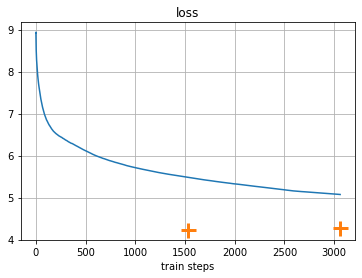

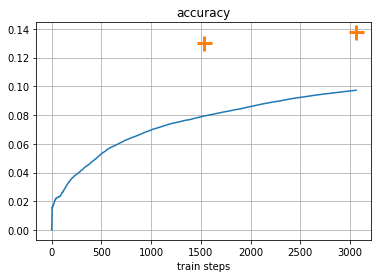

  0%|          | 0/3062 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

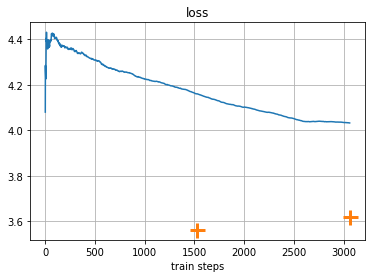

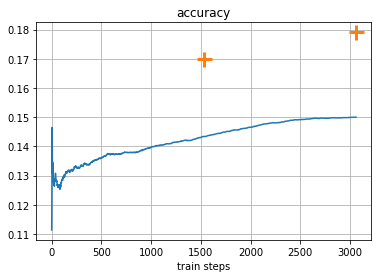

  0%|          | 0/3062 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

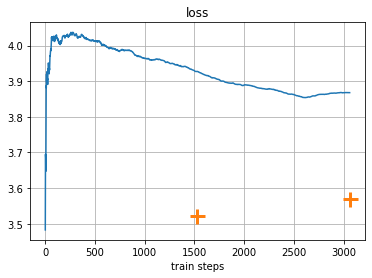

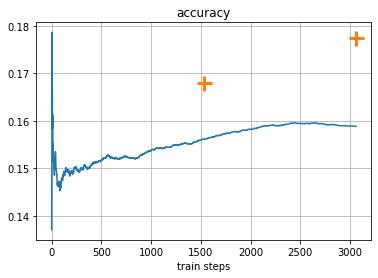

  0%|          | 0/3062 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

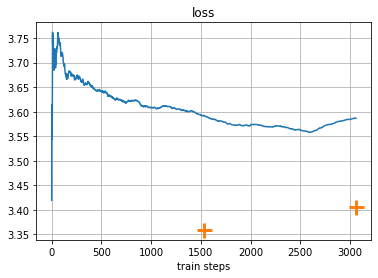

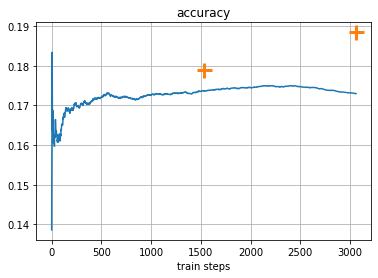

  0%|          | 0/3062 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

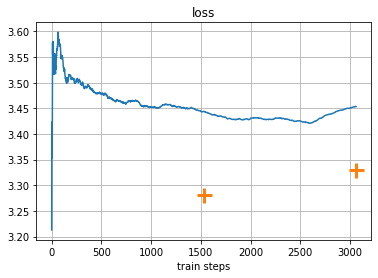

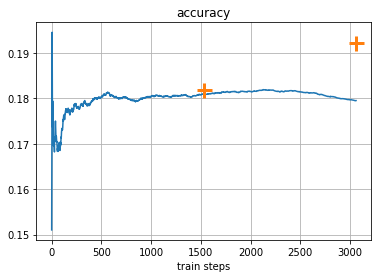

  0%|          | 0/3062 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

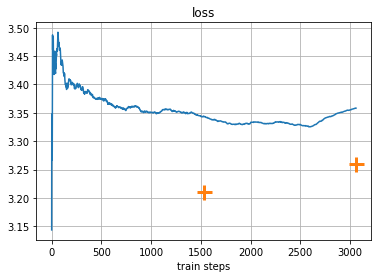

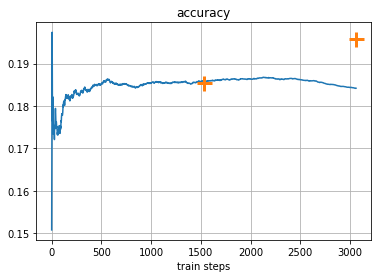

  0%|          | 0/3062 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

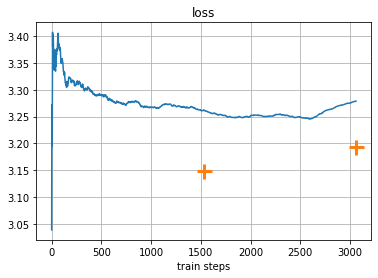

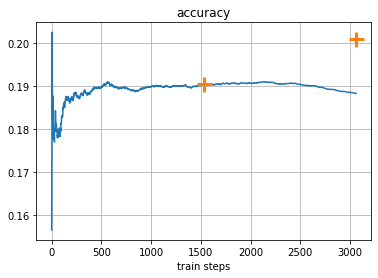

  0%|          | 0/3062 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

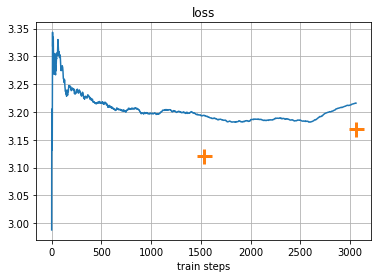

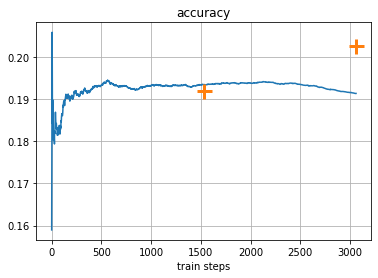

  0%|          | 0/3062 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

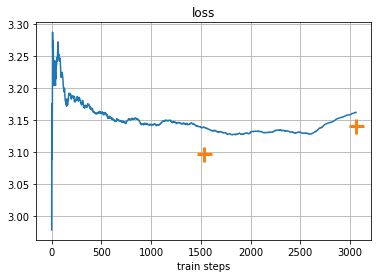

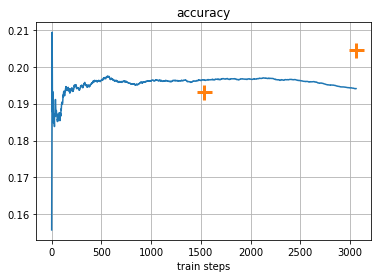

  0%|          | 0/3062 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

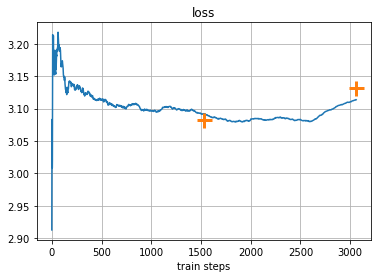

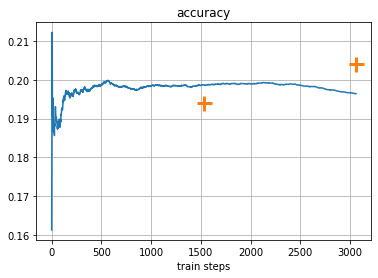

  0%|          | 0/3062 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

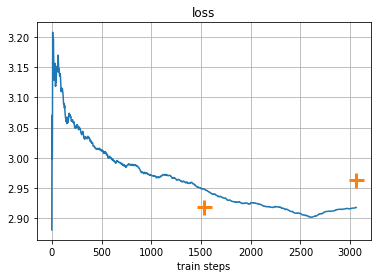

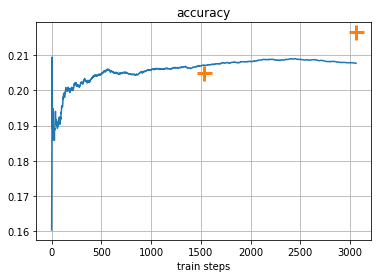

  0%|          | 0/3062 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

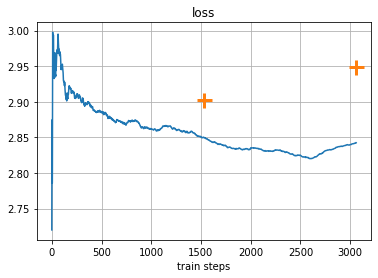

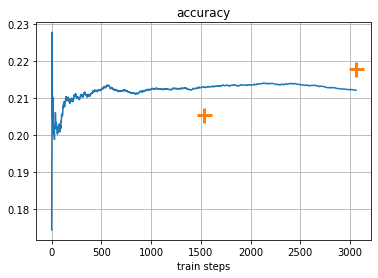

  0%|          | 0/3062 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

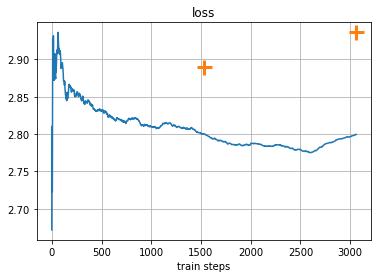

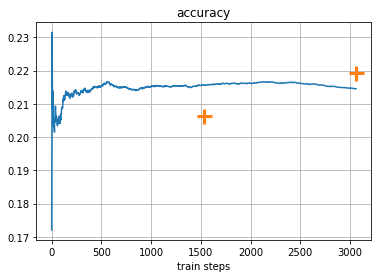

  0%|          | 0/3062 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

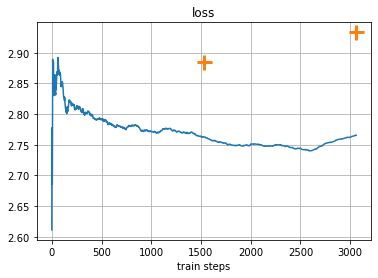

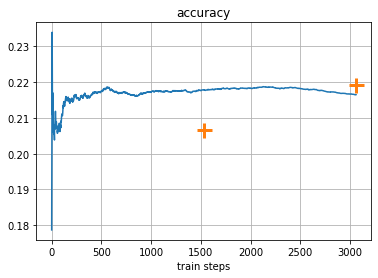

  0%|          | 0/3062 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

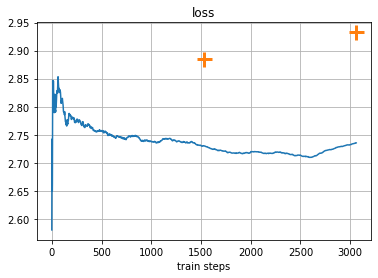

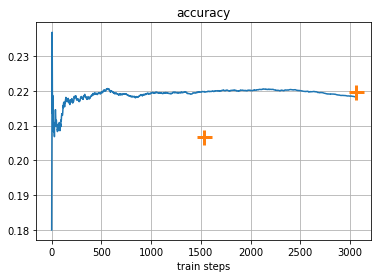

  0%|          | 0/3062 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

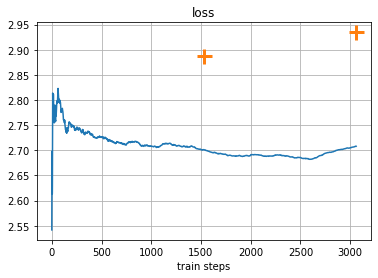

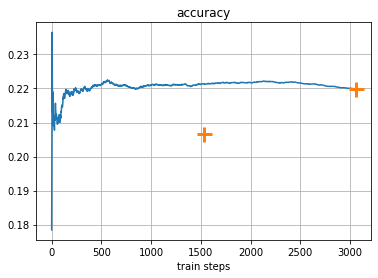

  0%|          | 0/3062 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

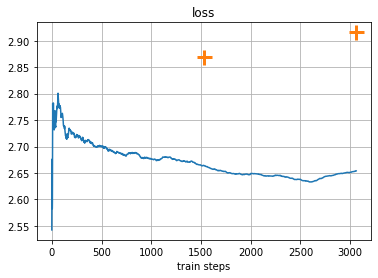

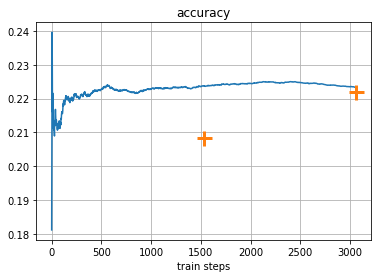

  0%|          | 0/3062 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

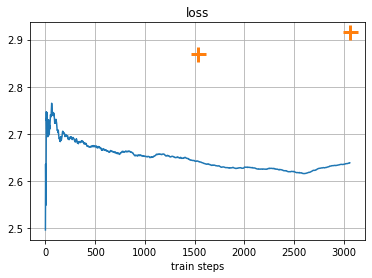

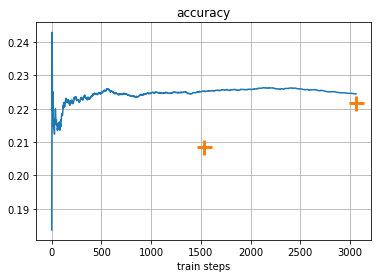

  0%|          | 0/3062 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

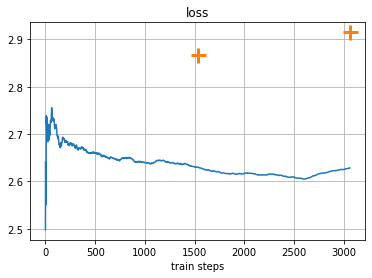

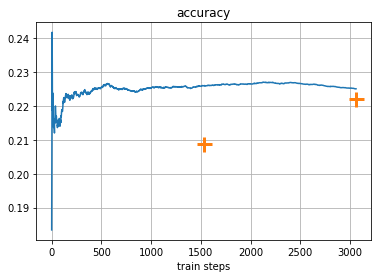

  0%|          | 0/3062 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

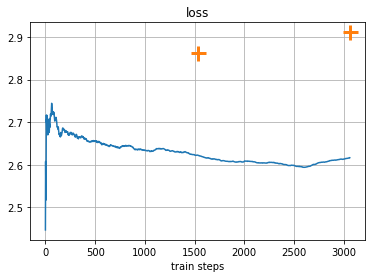

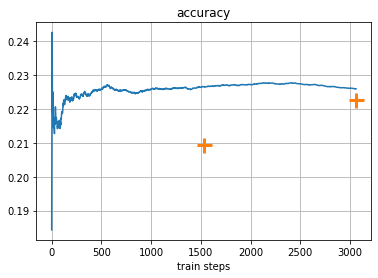

  0%|          | 0/3062 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

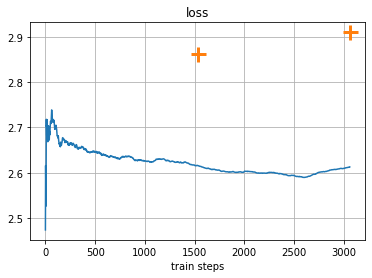

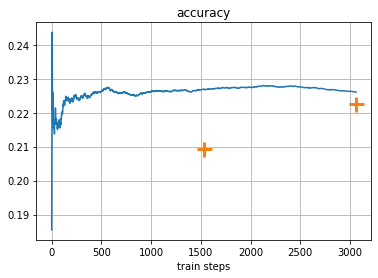

  0%|          | 0/3062 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

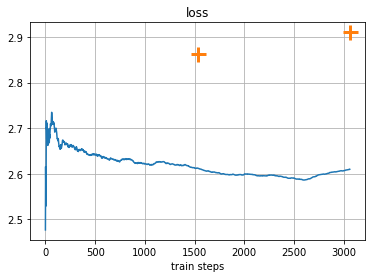

----------------------------
epoch 0 out of 2
doing phase train
loss is 5.072031278068298
accuracy is 0.09728821976838309
this phase took 7m 42s
doing phase val
BLEU is 5.66
made improvement 5.66
loss is 4.280655920505524
accuracy is 0.13758116880947524
this phase took 0m 33s
total elapsed time 8m 24s
----------------------------
epoch 1 out of 2
doing phase train
loss is 4.032032755603205
accuracy is 0.15000666041983982
this phase took 7m 17s
doing phase val
BLEU is 13.83
made improvement 13.83
loss is 3.619524732232094
accuracy is 0.1790696831500241
this phase took 0m 26s
total elapsed time 16m 9s

best bleu is 13.83
got such bleu at epoch 1
----------------------------
epoch 0 out of 20
doing phase train
loss is 3.867776768570395
accuracy is 0.1588488830088498
this phase took 7m 17s
doing phase val
BLEU is 14.68
made improvement 14.68
loss is 3.5706779807806015
accuracy is 0.1774619252186388
this phase took 0m 30s
total elapsed time 7m 47s
----------------------------
epoch 1 out of

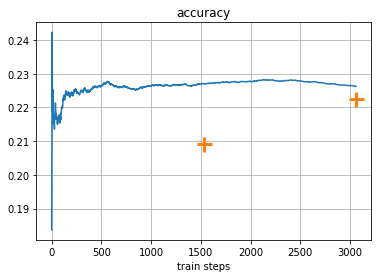

True

In [ ]:
#pragma async
#!g1.1

def change_lr(optim, value):
    for g in optim.param_groups:
        g['lr'] = value

optimizer = torch.optim.AdamW(transformer.parameters(), lr=0.0001)

train(2, transformer, optimizer, None, loss_fn, DEVICE, 1, 64, 2, False, True)

change_lr(optimizer, 0.0005)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', factor=0.2, patience=1, threshold_mode='abs', 
                                           cooldown=0, verbose=True, eps=1e-8, threshold=0.2)

train(20, transformer, optimizer, scheduler, loss_fn, DEVICE, 1, 64, 2, False, True)
True

In [ ]:
#pragma async
#!g1.1
train(10, transformer, optimizer, scheduler, loss_fn, DEVICE, 1, 64, 2, False, True)
True

Preparing g1.1 instance...


In [ ]:
#!g1.1
transformer.load_state_dict(best_model_wts)

<All keys matched successfully>

In [ ]:
#!g1.1

DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

save_to_file(transformer, conv_val_X, 'val.pred', 64, 1, DEVICE, 0)

  0%|          | 0/16 [00:00<?, ?it/s]

In [ ]:
#!g1.1
!cat val.pred | sacrebleu homework_machine_translation_de-en/val.de-en.en  --tokenize none --width 2 --force -b

27.21


In [ ]:
#pragma async
#!g1.1
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
res = generate_output(transformer, conv_test_X, 64, 1, DEVICE, 3)

Cannot apply result: following variables are changed in this cell and need manual merge: res, optimizer, conv_test_X, popis, totis
To apply changes run: %apply_state 2ce733d7-81ed-4b8b-8c8e-f5462ee34163/a4339378-6bee-4ebe-a344-9dd177a8c4c5

  0%|          | 0/2998 [00:00<?, ?it/s]

In [ ]:
#!g1.1
with open('test1.de-en.en', 'w') as file:
    for i in res:
        file.write(i + '\n')


/kernel/lib/python3.7/site-packages/ml_kernel/kernel.py:859: UserWarning: The following variables cannot be serialized: file
  warnings.warn(message)
